# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

In [4]:
train_X

array([[[[110., 118., 130.],
         [117., 125., 136.],
         [121., 126., 137.],
         ...,
         [ 88.,  75.,  71.],
         [ 95.,  79.,  72.],
         [100.,  82.,  72.]],

        [[121., 130., 140.],
         [129., 136., 146.],
         [134., 140., 149.],
         ...,
         [ 87.,  74.,  71.],
         [ 94.,  78.,  71.],
         [100.,  82.,  72.]],

        [[116., 125., 134.],
         [122., 130., 138.],
         [126., 131., 139.],
         ...,
         [ 87.,  74.,  71.],
         [ 94.,  78.,  71.],
         [ 99.,  81.,  71.]],

        ...,

        [[ 88.,  76.,  85.],
         [ 92.,  82.,  89.],
         [ 94.,  85.,  92.],
         ...,
         [ 93.,  73.,  64.],
         [101.,  79.,  67.],
         [108.,  85.,  71.]],

        [[ 89.,  75.,  80.],
         [ 93.,  81.,  86.],
         [ 96.,  84.,  89.],
         ...,
         [ 95.,  74.,  64.],
         [103.,  79.,  67.],
         [109.,  85.,  71.]],

        [[ 86.,  70.,  70.],
       

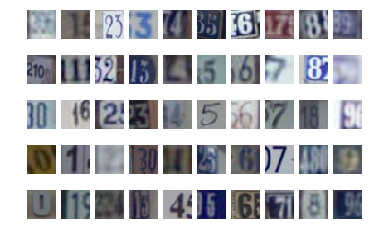

In [5]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [7]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [8]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k = 1)
knn_classifier.fit(binary_train_X, binary_train_y)

In [9]:
binary_train_X.shape

(130, 3072)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

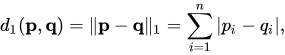

In [10]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [11]:
dists

array([[113715., 116537., 113437., ..., 150272., 131010.,  91981.],
       [177678.,  95538.,  88700., ..., 138591.,  83551., 157274.],
       [327306., 161492., 162030., ..., 122319., 138515., 310976.],
       ...,
       [ 91245., 180573., 189255., ..., 210572., 222866.,  73959.],
       [227459., 117317., 103811., ..., 145460.,  84404., 211579.],
       [335968., 167302., 151664., ..., 137321., 115017., 318726.]],
      dtype=float32)

In [12]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


AxisError: axis 2 is out of bounds for array of dimension 2

In [16]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [12]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

18.9 ms ± 87.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.93 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.07 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

predict_labels_binary


In [14]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.3f, Precision: %4.3f, Recall: %4.3f, F1: %4.3f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.550, Precision: 0.636, Recall: 0.583, F1: 0.609


In [40]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

predict_labels_binary
KNN with k = 3
Accuracy: 0.58, Precision: 0.67, Recall: 0.33, F1: 0.44


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение k! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [42]:
from sklearn.model_selection import StratifiedKFold

In [71]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
cv = StratifiedKFold(num_folds)



k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    f1 = []
    for train_indexes, test_indexes in cv.split(binary_train_X, binary_train_y):
        train_folds_X = binary_train_X[train_indexes]
        train_folds_y = binary_train_y[train_indexes]
        test_folds_X = binary_train_X[test_indexes]
        test_folds_y = binary_train_y[test_indexes]
        
        knn_classifier = KNN(k)
        knn_classifier.fit(train_folds_X, train_folds_y)
        prediction = knn_classifier.predict(test_folds_X)
        f1.append(binary_classification_metrics(prediction, test_folds_y))
    k_to_f1[k] = f1
    f1 = []

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, np.mean(k_to_f1[k])), np.std(k_to_f1[k]))

predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_la

/home/whale/PythonProjects/dl_nsu/assignment1/metrics.py:28: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision*recall / (precision+recall)
/home/whale/PythonProjects/dl_nsu/assignment1/metrics.py:28: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision*recall / (precision+recall)


In [46]:
binary_train_X.shape

(130, 3072)

In [70]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
step = int(len(binary_train_X)/num_folds)
for i in range(num_folds): 
    train_folds_X.append(binary_train_X[step * i:step * (i + 1)])
    train_folds_y.append(binary_train_y[step * i:step * (i + 1)])
    


k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    f1 = []
    for fold_num in range(len(train_folds_X)):
        test_fold_x = train_folds_X.pop(0)
        test_fold_y = train_folds_y.pop(0)
        knn_classifier = KNN(k)
        knn_classifier.fit(np.concatenate(train_folds_X), np.concatenate(train_folds_y))
        train_folds_X.append(test_fold_x)
        train_folds_y.append(test_fold_y)
        prediction = knn_classifier.predict(test_fold_x)
        f1.append(binary_classification_metrics(prediction, test_fold_y))
    k_to_f1[k] = f1
    f1 = []

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, np.mean(k_to_f1[k])), np.std(k_to_f1[k]))
#     print(f'k = {k}, f1 = {k_to_f1[k]}')

predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_labels_binary
predict_la

/home/whale/PythonProjects/dl_nsu/assignment1/metrics.py:24: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [39]:
# TODO Set the best k to the best value found by cross-validation
best_k = 8

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

predict_labels_binary
Best KNN with k = 8
Accuracy: 0.50, Precision: 0.38, Recall: 0.60, F1: 0.46


In [40]:
# TODO Set the best k to the best value found by cross-validation
best_k = 2

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

predict_labels_binary
Best KNN with k = 2
Accuracy: 0.36, Precision: 0.30, Recall: 0.60, F1: 0.40


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [20]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [21]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [22]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.00


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [23]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    pass

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [ ]:
# TODO Set the best k as a best from computed
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)